In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import re

%matplotlib inline

In [2]:
# Read in the CSV file with low_memory=False
df = pd.read_csv('freshdesk.csv', low_memory=False)

# Print the dataframe to verify the data types
df.head(10)


,cc_emails,fr_escalated,priority,fr_due_by,requester,group_id,support_email,id,_sdc_table_version,updated_at,...,nr_due_by,company,deleted,company_id,tags,internal_agent_id,internal_group_id,association_type,associated_tickets_count,form_id
0,[{'value': 'amobilota@gmail.com'} {'value': 's...,True,1,2021-08-11 07:51:00+00:00,"{'name': 'Lotanna amobi', 'id': 69010753905, '...",6.900044e+10,sparklengsupport@newaccount1625449603577.fresh...,1133,0,2021-08-16 13:25:38+00:00,...,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN,NaN
1,[],False,1,2021-08-23 08:00:00+00:00,"{'name': 'jnr_bain', 'id': 69011392584, 'email...",6.900044e+10,NaN,1815,0,2021-08-29 08:44:12+00:00,...,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN,NaN
2,[],True,1,2021-08-25 10:06:09+00:00,"{'name': 'COLINA LOPEZ LEMLEY', 'id': 69011022...",NaN,sparklengsupport@newaccount1625449603577.fresh...,1976,0,2021-08-30 10:24:25+00:00,...,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN,NaN
3,[],False,1,2021-09-07 10:22:04+00:00,"{'name': 'Leo Okoedo', 'id': 69011285986, 'ema...",6.900044e+10,sparklengsupport@newaccount1625449603577.fresh...,2564,0,2021-09-07 09:40:39+00:00,...,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN,NaN
4,[],False,1,2021-10-08 09:00:00+00:00,"{'name': 'The King Delly', 'id': 69011511919, ...",6.900044e+10,sparklengsupport@newaccount1625449603577.fresh...,4210,0,2021-10-08 11:47:27+00:00,...,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN,NaN
5,[],True,1,2021-11-29 09:00:00+00:00,"{'name': 'zumaki100', 'id': 69019671410, 'emai...",6.900044e+10,NaN,7326,0,2021-12-04 11:26:39+00:00,...,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN,NaN
6,[{'value': 'jmaiyejina@unionbankng.com'}\n {'v...,False,1,2021-12-13 09:48:35+00:00,"{'name': 'CUSTOMERSERVICE', 'id': 69012448573,...",NaN,support@sparkle.ng,8695,0,2021-12-21 17:31:15+00:00,...,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN,NaN
7,[],False,1,2022-10-24 09:23:59+00:00,"{'name': 'Ayomide oluwadarasimi', 'id': 690393...",6.900044e+10,NaN,57220,0,2022-10-29 09:31:05+00:00,...,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN,NaN
8,[],False,1,2022-09-29 08:19:05+00:00,"{'name': 'Edewor Benjamin', 'id': 69037924424,...",6.900044e+10,NaN,52224,0,2022-10-02 07:23:49+00:00,...,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN,NaN
9,[],False,1,2022-09-19 09:00:20+00:00,"{'name': 'Adesiji Omojuwa', 'id': 69029195721,...",6.900044e+10,NaN,50556,0,2022-09-23 15:51:46+00:00,...,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN,NaN


In [3]:
for column in df.columns:
    print(column)

cc_emails
fr_escalated
priority
fr_due_by
requester
group_id
support_email
id
_sdc_table_version
updated_at
is_escalated
status
custom_fields
subject
nr_escalated
ticket_cc_emails
_sdc_received_at
_sdc_sequence
source
type
reply_cc_emails
created_at
to_emails
spam
requester_id
_sdc_batched_at
email_config_id
_sdc_extracted_at
due_by
stats
responder_id
fwd_emails
nr_due_by
company
deleted
company_id
tags
internal_agent_id
internal_group_id
association_type
associated_tickets_count
form_id


In [4]:
df.shape


(80936, 42)

In [5]:
# drop columns with null values
df.dropna(thresh=0.6*len(df), axis=1, inplace = True)

In [6]:
for column in df.columns:
    print(column)

cc_emails
fr_escalated
priority
fr_due_by
requester
group_id
support_email
id
_sdc_table_version
updated_at
is_escalated
status
custom_fields
subject
nr_escalated
ticket_cc_emails
_sdc_received_at
_sdc_sequence
source
type
reply_cc_emails
created_at
to_emails
spam
requester_id
_sdc_batched_at
email_config_id
_sdc_extracted_at
due_by
stats
responder_id
fwd_emails
tags


In [7]:
df.head()

,cc_emails,fr_escalated,priority,fr_due_by,requester,group_id,support_email,id,_sdc_table_version,updated_at,...,spam,requester_id,_sdc_batched_at,email_config_id,_sdc_extracted_at,due_by,stats,responder_id,fwd_emails,tags
0,[{'value': 'amobilota@gmail.com'} {'value': 's...,True,1,2021-08-11 07:51:00+00:00,"{'name': 'Lotanna amobi', 'id': 69010753905, '...",6.900044e+10,sparklengsupport@newaccount1625449603577.fresh...,1133,0,2021-08-16 13:25:38+00:00,...,False,69010753905,2021-08-16 13:48:05.891000+00:00,6.900008e+10,2021-08-16 13:36:43.108000+00:00,2021-08-16 09:10:00+00:00,"{'closed_at': datetime.datetime(2021, 8, 16, 1...",6.900883e+10,[],[]
1,[],False,1,2021-08-23 08:00:00+00:00,"{'name': 'jnr_bain', 'id': 69011392584, 'email...",6.900044e+10,NaN,1815,0,2021-08-29 08:44:12+00:00,...,False,69011392584,2021-08-29 09:10:48.543000+00:00,NaN,2021-08-29 09:01:41.685000+00:00,2021-08-25 16:00:00+00:00,"{'closed_at': datetime.datetime(2021, 8, 26, 2...",6.900883e+10,[],[]
2,[],True,1,2021-08-25 10:06:09+00:00,"{'name': 'COLINA LOPEZ LEMLEY', 'id': 69011022...",NaN,sparklengsupport@newaccount1625449603577.fresh...,1976,0,2021-08-30 10:24:25+00:00,...,False,69011022681,2021-08-30 10:39:47.442000+00:00,6.900008e+10,2021-08-30 10:32:41.497000+00:00,2021-09-03 14:19:00+00:00,"{'closed_at': datetime.datetime(2021, 8, 30, 1...",6.900883e+10,[],[]
3,[],False,1,2021-09-07 10:22:04+00:00,"{'name': 'Leo Okoedo', 'id': 69011285986, 'ema...",6.900044e+10,sparklengsupport@newaccount1625449603577.fresh...,2564,0,2021-09-07 09:40:39+00:00,...,False,69011285986,2021-09-07 10:08:50.615000+00:00,6.900008e+10,2021-09-07 10:01:42.033000+00:00,2021-09-09 13:22:17+00:00,"{'closed_at': datetime.datetime(2021, 9, 7, 9,...",6.900883e+10,[],[]
4,[],False,1,2021-10-08 09:00:00+00:00,"{'name': 'The King Delly', 'id': 69011511919, ...",6.900044e+10,sparklengsupport@newaccount1625449603577.fresh...,4210,0,2021-10-08 11:47:27+00:00,...,False,69011511919,2021-10-08 12:08:07.479000+00:00,6.900008e+10,2021-10-08 12:01:59.424000+00:00,2021-10-12 12:00:52+00:00,"{'closed_at': datetime.datetime(2021, 10, 8, 1...",6.900883e+10,[],[]


In [8]:
df['subject'].head()

0                            RE: Your App Is The Worst
1                          View the message on Twitter
2    Good morning sparkle my friend sent me money t...
3                                     Blocked account 
4                                   Transaction Failed
Name: subject, dtype: object

In [9]:
df['requester'].head(5)

0    {'name': 'Lotanna amobi', 'id': 69010753905, '...
1    {'name': 'jnr_bain', 'id': 69011392584, 'email...
2    {'name': 'COLINA LOPEZ LEMLEY', 'id': 69011022...
3    {'name': 'Leo Okoedo', 'id': 69011285986, 'ema...
4    {'name': 'The King Delly', 'id': 69011511919, ...
Name: requester, dtype: object

In [10]:
df = df.drop([col for col in df.columns if df[col].eq(0.0).any()], axis=1)

In [11]:
df

,cc_emails,priority,fr_due_by,requester,group_id,support_email,id,updated_at,status,custom_fields,...,to_emails,requester_id,_sdc_batched_at,email_config_id,_sdc_extracted_at,due_by,stats,responder_id,fwd_emails,tags
0,[{'value': 'amobilota@gmail.com'} {'value': 's...,1,2021-08-11 07:51:00+00:00,"{'name': 'Lotanna amobi', 'id': 69010753905, '...",6.900044e+10,sparklengsupport@newaccount1625449603577.fresh...,1133,2021-08-16 13:25:38+00:00,5,"[{'value': {'name': 'cf_fsm_contact_name', 'va...",...,"[{'value': '""Lotanna amobi"" <amobilota@gmail.c...",69010753905,2021-08-16 13:48:05.891000+00:00,6.900008e+10,2021-08-16 13:36:43.108000+00:00,2021-08-16 09:10:00+00:00,"{'closed_at': datetime.datetime(2021, 8, 16, 1...",6.900883e+10,[],[]
1,[],1,2021-08-23 08:00:00+00:00,"{'name': 'jnr_bain', 'id': 69011392584, 'email...",6.900044e+10,NaN,1815,2021-08-29 08:44:12+00:00,5,"[{'value': {'name': 'cf_fsm_contact_name', 'va...",...,[],69011392584,2021-08-29 09:10:48.543000+00:00,NaN,2021-08-29 09:01:41.685000+00:00,2021-08-25 16:00:00+00:00,"{'closed_at': datetime.datetime(2021, 8, 26, 2...",6.900883e+10,[],[]
2,[],1,2021-08-25 10:06:09+00:00,"{'name': 'COLINA LOPEZ LEMLEY', 'id': 69011022...",NaN,sparklengsupport@newaccount1625449603577.fresh...,1976,2021-08-30 10:24:25+00:00,5,"[{'value': {'name': 'cf_fsm_contact_name', 'va...",...,[{'value': 'support@sparkle.ng'}],69011022681,2021-08-30 10:39:47.442000+00:00,6.900008e+10,2021-08-30 10:32:41.497000+00:00,2021-09-03 14:19:00+00:00,"{'closed_at': datetime.datetime(2021, 8, 30, 1...",6.900883e+10,[],[]
3,[],1,2021-09-07 10:22:04+00:00,"{'name': 'Leo Okoedo', 'id': 69011285986, 'ema...",6.900044e+10,sparklengsupport@newaccount1625449603577.fresh...,2564,2021-09-07 09:40:39+00:00,5,"[{'value': {'name': 'cf_fsm_contact_name', 'va...",...,[{'value': 'support@sparkle.ng'}],69011285986,2021-09-07 10:08:50.615000+00:00,6.900008e+10,2021-09-07 10:01:42.033000+00:00,2021-09-09 13:22:17+00:00,"{'closed_at': datetime.datetime(2021, 9, 7, 9,...",6.900883e+10,[],[]
4,[],1,2021-10-08 09:00:00+00:00,"{'name': 'The King Delly', 'id': 69011511919, ...",6.900044e+10,sparklengsupport@newaccount1625449603577.fresh...,4210,2021-10-08 11:47:27+00:00,5,"[{'value': {'name': 'cf_fsm_contact_name', 'va...",...,"[{'value': '""Sparkle Support"" <support@sparkle...",69011511919,2021-10-08 12:08:07.479000+00:00,6.900008e+10,2021-10-08 12:01:59.424000+00:00,2021-10-12 12:00:52+00:00,"{'closed_at': datetime.datetime(2021, 10, 8, 1...",6.900883e+10,[],[]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80931,[],1,2022-04-01 09:00:27+00:00,"{'name': 'Amadimarvellous1', 'id': 69027299106...",6.900044e+10,NaN,21321,2022-04-01 09:34:52+00:00,5,"[{'value': {'name': 'cf_fsm_contact_name', 'va...",...,[],69027299106,2022-04-01 10:13:44.467000+00:00,NaN,2022-04-01 10:01:24.567000+00:00,2022-04-05 12:00:27+00:00,"{'closed_at': datetime.datetime(2022, 4, 1, 9,...",6.900883e+10,[],[]
80932,[],2,NaN,"{'name': 'Joyce Matthias', 'id': 69008829728, ...",NaN,NaN,430,2021-07-21 00:20:34+00:00,4,"[{'value': {'name': 'cf_fsm_contact_name', 'va...",...,[],69008829728,2021-07-29 02:39:33.920000+00:00,NaN,2021-07-29 02:36:27.540000+00:00,NaN,"{'closed_at': None, 'resolved_at': datetime.da...",6.900883e+10,[],[]
80933,[],1,NaN,"{'name': 'Joyce Matthias', 'id': 69008829728, ...",NaN,NaN,464,2021-07-21 00:20:35+00:00,2,"[{'value': {'name': 'cf_fsm_contact_name', 'va...",...,[],69008829728,2021-07-29 02:39:33.920000+00:00,NaN,2021-07-29 02:36:33.551000+00:00,NaN,"{'closed_at': None, 'resolved_at': None, 'stat...",6.900883e+10,[],[]
80934,[],1,NaN,"{'name': 'Amarachi Joel', 'id': 69008829727, '...",NaN,NaN,679,2021-07-28 11:43:04+00:00,8,"[{'value': {'name': 'cf_fsm_contact_name', 'va...",...,[],69008829727,2021-07-29 02:49:29.933000+00:00,NaN,2021-07-29 02:39:33.685000+00:00,NaN,"{'closed_at': None, 'resolved_at': None, 'stat...",6.900883e+10,[],[]


In [12]:
for column in df.columns:
    print(column)

cc_emails
priority
fr_due_by
requester
group_id
support_email
id
updated_at
status
custom_fields
subject
ticket_cc_emails
_sdc_received_at
_sdc_sequence
source
type
reply_cc_emails
created_at
to_emails
requester_id
_sdc_batched_at
email_config_id
_sdc_extracted_at
due_by
stats
responder_id
fwd_emails
tags


In [13]:
df.drop_duplicates (subset=None, keep='first', inplace=True)

In [14]:
df.shape


(80936, 28)

In [15]:
# pandas drop columns using list of column names
df.drop(['reply_cc_emails','to_emails','_sdc_batched_at','email_config_id','_sdc_extracted_at','stats','fwd_emails','tags',
         'cc_emails','priority','group_id','support_email','id','updated_at','custom_fields','ticket_cc_emails','source',
         '_sdc_sequence','responder_id'], axis=1, inplace=True)

In [16]:
df.head()

,fr_due_by,requester,status,subject,_sdc_received_at,type,created_at,requester_id,due_by
0,2021-08-11 07:51:00+00:00,"{'name': 'Lotanna amobi', 'id': 69010753905, '...",5,RE: Your App Is The Worst,2021-08-16 13:39:00.384000+00:00,Others,2021-08-10 15:50:39+00:00,69010753905,2021-08-16 09:10:00+00:00
1,2021-08-23 08:00:00+00:00,"{'name': 'jnr_bain', 'id': 69011392584, 'email...",5,View the message on Twitter,2021-08-29 09:03:54.768000+00:00,Enquiry,2021-08-20 18:53:57+00:00,69011392584,2021-08-25 16:00:00+00:00
2,2021-08-25 10:06:09+00:00,"{'name': 'COLINA LOPEZ LEMLEY', 'id': 69011022...",5,Good morning sparkle my friend sent me money t...,2021-08-30 10:34:06.440000+00:00,Transfer Failures - Incoming,2021-08-25 09:06:09+00:00,69011022681,2021-09-03 14:19:00+00:00
3,2021-09-07 10:22:04+00:00,"{'name': 'Leo Okoedo', 'id': 69011285986, 'ema...",5,Blocked account,2021-09-07 10:02:55.434000+00:00,Child Ticket,2021-09-07 09:22:04+00:00,69011285986,2021-09-09 13:22:17+00:00
4,2021-10-08 09:00:00+00:00,"{'name': 'The King Delly', 'id': 69011511919, ...",5,Transaction Failed,2021-10-08 12:04:59.669000+00:00,Child Ticket,2021-10-08 07:54:04+00:00,69011511919,2021-10-12 12:00:52+00:00


In [18]:
import re

# extract names
df['requester_names'] = df['requester'].apply(lambda x: re.findall(r"'name': '([^']*)'", x))

# extract emails
df['requester_emails'] = df['requester'].apply(lambda x: re.findall(r"'email': '([^']*)'", x))

# convert names and emails lists to strings and remove square [] brackets from names and emails in the new columns
df['requester_names'] = df['requester_names'].apply(lambda x: ', '.join(x).strip('[]'))
df['requester_emails'] = df['requester_emails'].apply(lambda x: ', '.join(x).strip('[]'))


In [51]:
# Ast library is a for converting dictionary to string type column 
# such that i can access the values in requester table using the keys o the values

In [19]:
df.head()

,fr_due_by,requester,status,subject,_sdc_received_at,type,created_at,requester_id,due_by,requester_names,requester_emails
0,2021-08-11 07:51:00+00:00,"{'name': 'Lotanna amobi', 'id': 69010753905, '...",5,RE: Your App Is The Worst,2021-08-16 13:39:00.384000+00:00,Others,2021-08-10 15:50:39+00:00,69010753905,2021-08-16 09:10:00+00:00,Lotanna amobi,amobilota@gmail.com
1,2021-08-23 08:00:00+00:00,"{'name': 'jnr_bain', 'id': 69011392584, 'email...",5,View the message on Twitter,2021-08-29 09:03:54.768000+00:00,Enquiry,2021-08-20 18:53:57+00:00,69011392584,2021-08-25 16:00:00+00:00,jnr_bain,
2,2021-08-25 10:06:09+00:00,"{'name': 'COLINA LOPEZ LEMLEY', 'id': 69011022...",5,Good morning sparkle my friend sent me money t...,2021-08-30 10:34:06.440000+00:00,Transfer Failures - Incoming,2021-08-25 09:06:09+00:00,69011022681,2021-09-03 14:19:00+00:00,COLINA LOPEZ LEMLEY,lemleycolinalopez@gmail.com
3,2021-09-07 10:22:04+00:00,"{'name': 'Leo Okoedo', 'id': 69011285986, 'ema...",5,Blocked account,2021-09-07 10:02:55.434000+00:00,Child Ticket,2021-09-07 09:22:04+00:00,69011285986,2021-09-09 13:22:17+00:00,Leo Okoedo,leookoedo573@gmail.com
4,2021-10-08 09:00:00+00:00,"{'name': 'The King Delly', 'id': 69011511919, ...",5,Transaction Failed,2021-10-08 12:04:59.669000+00:00,Child Ticket,2021-10-08 07:54:04+00:00,69011511919,2021-10-12 12:00:52+00:00,The King Delly,thekingdelly7@gmail.com


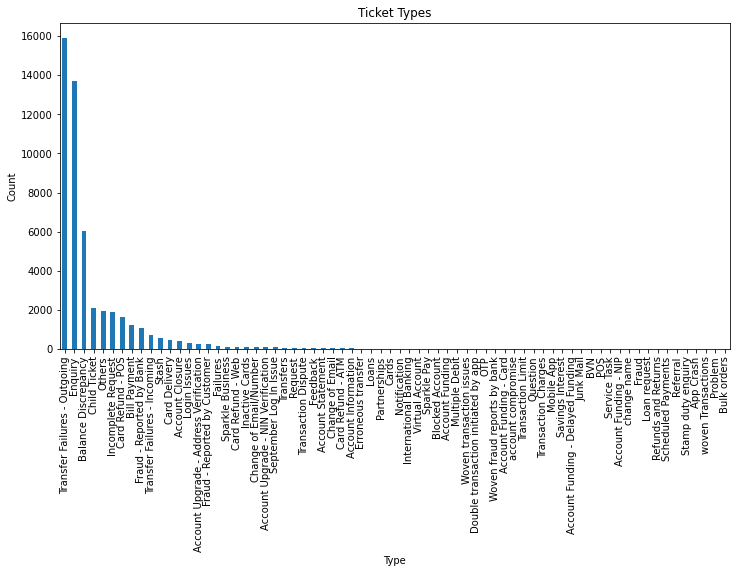

In [23]:

# count occurrences of each category
counts = df['type'].value_counts()

# plot column chart
ax = counts.plot(kind='bar', figsize=(12, 6))
ax.set_title('Ticket Types')
ax.set_xlabel('Type')
ax.set_ylabel('Count')
plt.show()


In [27]:
import nltk
from nltk.corpus import stopwords

# download stopwords if necessary
nltk.download('stopwords')

# define function to remove stopwords
def remove_stopwords(text):
    stopwords_list = stopwords.words('english')
    tokens = text.split()
    filtered_tokens = [token for token in tokens if token.lower() not in stopwords_list]
    filtered_text = ' '.join(filtered_tokens)
    return filtered_text

# apply function to text column
df['Text'] = df['subject'].fillna('').apply(remove_stopwords)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [30]:
df.head(20)

,fr_due_by,requester,status,subject,_sdc_received_at,type,created_at,requester_id,due_by,requester_names,requester_emails,Text
0,2021-08-11 07:51:00+00:00,"{'name': 'Lotanna amobi', 'id': 69010753905, '...",5,RE: Your App Is The Worst,2021-08-16 13:39:00.384000+00:00,Others,2021-08-10 15:50:39+00:00,69010753905,2021-08-16 09:10:00+00:00,Lotanna amobi,amobilota@gmail.com,RE: App Worst
1,2021-08-23 08:00:00+00:00,"{'name': 'jnr_bain', 'id': 69011392584, 'email...",5,View the message on Twitter,2021-08-29 09:03:54.768000+00:00,Enquiry,2021-08-20 18:53:57+00:00,69011392584,2021-08-25 16:00:00+00:00,jnr_bain,,View message Twitter
2,2021-08-25 10:06:09+00:00,"{'name': 'COLINA LOPEZ LEMLEY', 'id': 69011022...",5,Good morning sparkle my friend sent me money t...,2021-08-30 10:34:06.440000+00:00,Transfer Failures - Incoming,2021-08-25 09:06:09+00:00,69011022681,2021-09-03 14:19:00+00:00,COLINA LOPEZ LEMLEY,lemleycolinalopez@gmail.com,Good morning sparkle friend sent money morning...
3,2021-09-07 10:22:04+00:00,"{'name': 'Leo Okoedo', 'id': 69011285986, 'ema...",5,Blocked account,2021-09-07 10:02:55.434000+00:00,Child Ticket,2021-09-07 09:22:04+00:00,69011285986,2021-09-09 13:22:17+00:00,Leo Okoedo,leookoedo573@gmail.com,Blocked account
4,2021-10-08 09:00:00+00:00,"{'name': 'The King Delly', 'id': 69011511919, ...",5,Transaction Failed,2021-10-08 12:04:59.669000+00:00,Child Ticket,2021-10-08 07:54:04+00:00,69011511919,2021-10-12 12:00:52+00:00,The King Delly,thekingdelly7@gmail.com,Transaction Failed
5,2021-11-29 09:00:00+00:00,"{'name': 'zumaki100', 'id': 69019671410, 'emai...",5,View the message on Twitter,2021-12-04 11:34:28.850000+00:00,Incomplete Request,2021-11-28 11:38:19+00:00,69019671410,2021-12-02 15:35:04+00:00,zumaki100,,View message Twitter
6,2021-12-13 09:48:35+00:00,"{'name': 'CUSTOMERSERVICE', 'id': 69012448573,...",5,ERRONEOUS TRANSFER,2021-12-21 18:02:46.561000+00:00,Others,2021-12-13 08:48:35+00:00,69012448573,2021-12-17 08:26:15+00:00,CUSTOMERSERVICE,customerservice@unionbankng.com,ERRONEOUS TRANSFER
7,2022-10-24 09:23:59+00:00,"{'name': 'Ayomide oluwadarasimi', 'id': 690393...",5,Hi,2022-10-29 09:35:52.782000+00:00,Incomplete Request,2022-10-24 08:23:58+00:00,69039325496,2022-10-28 08:01:31+00:00,Ayomide oluwadarasimi,oluwadarasimiayomide93@gmail.com,Hi
8,2022-09-29 08:19:05+00:00,"{'name': 'Edewor Benjamin', 'id': 69037924424,...",5,For Businesses Empowerment,2022-10-02 07:34:03.427000+00:00,Incomplete Request,2022-09-28 15:19:05+00:00,69037924424,2022-09-30 15:20:00+00:00,Edewor Benjamin,benotech2012@gmail.com,Businesses Empowerment
9,2022-09-19 09:00:20+00:00,"{'name': 'Adesiji Omojuwa', 'id': 69029195721,...",5,What’s wrong,2022-09-23 16:05:54.686000+00:00,Incomplete Request,2022-09-17 16:54:55+00:00,69029195721,2022-09-22 14:53:24+00:00,Adesiji Omojuwa,adesijiomojuwa1989@gmail.com,What’s wrong


In [31]:
# create a get_sentiment() function
# accepts a DataFrame and a column as parameters

def get_sentiment(dataframe, column):
  text_column = dataframe[column]
  
  #apply TextBlob constructor to each value of text_column 
  textblob_sentiment = text_column.apply(TextBlob)

  # extracts and creates a new DataFrame for Polarity and Objectivity columns
  sentiment_values = [ {'Polarity': v.sentiment.polarity,'Subjectivity': v.sentiment.subjectivity}
                      for v in textblob_sentiment.values]
  return pd.DataFrame(sentiment_values)

In [34]:
# test the get_sentiment function

from textblob import TextBlob
sentiment_frame = get_sentiment(df, 'Text')

In [35]:
sentiment_frame.head(5)

,Polarity,Subjectivity
0,-1.0,1.0
1,0.0,0.0
2,0.7,0.6
3,0.0,0.0
4,-0.5,0.3


In [36]:
# join the original tweet DataFrame to the sentiment_frame DataFrame

new_df = pd.concat([df, sentiment_frame], axis=1)

In [39]:
positive_complaints = new_df[new_df.Polarity > 0]
negative_complaints = new_df[new_df.Polarity <= 0]

In [40]:
positive_complaints

,fr_due_by,requester,status,subject,_sdc_received_at,type,created_at,requester_id,due_by,requester_names,requester_emails,Text,Polarity,Subjectivity
2,2021-08-25 10:06:09+00:00,"{'name': 'COLINA LOPEZ LEMLEY', 'id': 69011022...",5,Good morning sparkle my friend sent me money t...,2021-08-30 10:34:06.440000+00:00,Transfer Failures - Incoming,2021-08-25 09:06:09+00:00,69011022681,2021-09-03 14:19:00+00:00,COLINA LOPEZ LEMLEY,lemleycolinalopez@gmail.com,Good morning sparkle friend sent money morning...,0.70,0.60
13,2022-09-01 14:58:35+00:00,"{'name': 'Endofdaymail', 'id': 69030855976, 'e...",5,"EMP Uploaded file for ""SPKL"" to Secure ID Cards",2022-09-01 16:34:40.986000+00:00,Others,2022-09-01 13:58:35+00:00,69030855976,2022-09-02 13:59:00+00:00,Endofdaymail,endofdaymail@emp-group.com,"EMP Uploaded file ""SPKL"" Secure ID Cards",0.40,0.60
39,2022-07-15 09:00:00+00:00,"{'name': 'Hussaini Usman', 'id': 69030463751, ...",5,Hello good evening why is my account been show...,2022-07-20 09:44:38.152000+00:00,NaN,2022-07-14 18:40:03+00:00,69030463751,2022-07-20 12:17:48+00:00,Hussaini Usman,adamssuccessful@yahoo.com,Hello good evening account showing failed upgr...,0.10,0.45
44,2022-07-15 09:00:00+00:00,"{'name': 'Derick Akpojuvwehwe', 'id': 69033759...",5,Good evening,2022-07-20 11:44:30.395000+00:00,NaN,2022-07-14 21:58:58+00:00,69033759733,2022-07-20 12:23:20+00:00,Derick Akpojuvwehwe,,Good evening,0.70,0.60
61,2022-07-18 09:00:00+00:00,"{'name': 'Oluwasegun Emmanuel', 'id': 69034006...",5,Good morning,2022-07-23 08:34:21.449000+00:00,NaN,2022-07-17 05:32:52+00:00,69034006233,2022-07-25 12:00:00+00:00,Oluwasegun Emmanuel,,Good morning,0.70,0.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80878,2022-05-05 09:00:00+00:00,"{'name': 'Billing', 'id': 69010490483, 'email'...",5,Your Stitch Payment Was Successfully Processed...,2022-05-07 07:35:38.404000+00:00,Feedback,2022-05-04 22:14:27+00:00,69010490483,2022-05-06 10:00:00+00:00,Billing,billing@stitchdata.com,"Stitch Payment Successfully Processed (Stitch,...",0.75,0.95
80895,2021-11-15 09:00:00+00:00,"{'name': 'Olabisi FairMoney', 'id': 6901480724...",5,Fwd: Hello kindly attend to me,2021-11-18 21:32:29.468000+00:00,Fraud - Reported by Bank,2021-11-12 20:20:06+00:00,69014807247,2021-11-19 12:00:00+00:00,Olabisi FairMoney,help@fairmoney.ng,Fwd: Hello kindly attend,0.60,0.90
80902,2022-04-28 13:00:31+00:00,"{'name': 'Usman Philip', 'id': 69029096930, 'e...",5,Young boi,2022-04-28 16:27:52.871000+00:00,NaN,2022-04-28 12:00:30+00:00,69029096930,2022-05-06 08:00:31+00:00,Usman Philip,usmanphilip2018@gmail.com,Young boi,0.10,0.40
80904,2022-05-30 09:00:00+00:00,"{'name': 'Victor Samson', 'id': 69030483834, '...",5,Debited and didn’t top up my airtime,2022-05-29 07:03:31.681000+00:00,NaN,2022-05-29 06:13:31+00:00,69030483834,2022-06-01 12:00:00+00:00,Victor Samson,samsonvic22@gmail.com,Debited didn’t top airtime,0.50,0.50


In [41]:
negative_complaints

,fr_due_by,requester,status,subject,_sdc_received_at,type,created_at,requester_id,due_by,requester_names,requester_emails,Text,Polarity,Subjectivity
0,2021-08-11 07:51:00+00:00,"{'name': 'Lotanna amobi', 'id': 69010753905, '...",5,RE: Your App Is The Worst,2021-08-16 13:39:00.384000+00:00,Others,2021-08-10 15:50:39+00:00,69010753905,2021-08-16 09:10:00+00:00,Lotanna amobi,amobilota@gmail.com,RE: App Worst,-1.0,1.0
1,2021-08-23 08:00:00+00:00,"{'name': 'jnr_bain', 'id': 69011392584, 'email...",5,View the message on Twitter,2021-08-29 09:03:54.768000+00:00,Enquiry,2021-08-20 18:53:57+00:00,69011392584,2021-08-25 16:00:00+00:00,jnr_bain,,View message Twitter,0.0,0.0
3,2021-09-07 10:22:04+00:00,"{'name': 'Leo Okoedo', 'id': 69011285986, 'ema...",5,Blocked account,2021-09-07 10:02:55.434000+00:00,Child Ticket,2021-09-07 09:22:04+00:00,69011285986,2021-09-09 13:22:17+00:00,Leo Okoedo,leookoedo573@gmail.com,Blocked account,0.0,0.0
4,2021-10-08 09:00:00+00:00,"{'name': 'The King Delly', 'id': 69011511919, ...",5,Transaction Failed,2021-10-08 12:04:59.669000+00:00,Child Ticket,2021-10-08 07:54:04+00:00,69011511919,2021-10-12 12:00:52+00:00,The King Delly,thekingdelly7@gmail.com,Transaction Failed,-0.5,0.3
5,2021-11-29 09:00:00+00:00,"{'name': 'zumaki100', 'id': 69019671410, 'emai...",5,View the message on Twitter,2021-12-04 11:34:28.850000+00:00,Incomplete Request,2021-11-28 11:38:19+00:00,69019671410,2021-12-02 15:35:04+00:00,zumaki100,,View message Twitter,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80931,2022-04-01 09:00:27+00:00,"{'name': 'Amadimarvellous1', 'id': 69027299106...",5,My debit card delivery,2022-04-01 10:05:55.943000+00:00,NaN,2022-04-01 07:41:45+00:00,69027299106,2022-04-05 12:00:27+00:00,Amadimarvellous1,amadimarvellous1@gmail.com,debit card delivery,0.0,0.0
80932,NaN,"{'name': 'Joyce Matthias', 'id': 69008829728, ...",4,nip outgoing,2021-07-29 02:38:01.822000+00:00,Service Task,2021-07-19 13:40:35+00:00,69008829728,NaN,Joyce Matthias,joyce@sparkle.ng,nip outgoing,0.0,0.0
80933,NaN,"{'name': 'Joyce Matthias', 'id': 69008829728, ...",2,test,2021-07-29 02:38:01.822000+00:00,Service Task,2021-07-20 14:33:07+00:00,69008829728,NaN,Joyce Matthias,joyce@sparkle.ng,test,0.0,0.0
80934,NaN,"{'name': 'Amarachi Joel', 'id': 69008829727, '...",8,Upgrade issues,2021-07-29 02:42:07.759000+00:00,Service Task,2021-07-28 08:38:42+00:00,69008829727,NaN,Amarachi Joel,amarachi@sparkle.ng,Upgrade issues,0.0,0.0


In [43]:
def CPolarity(x):
    if x > 0:
        return 'Positive'
    elif x <= 0:
        return 'Negative'

In [44]:
new_df['Results'] = new_df['Polarity'].apply(CPolarity)

Negative    78510
Positive     2426
Name: Results, dtype: int64


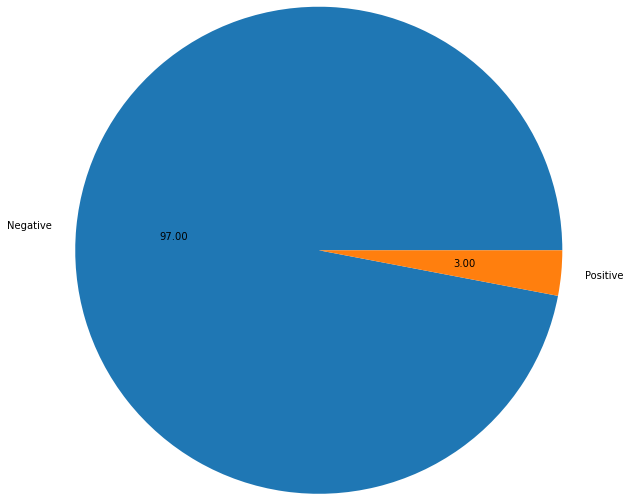

In [47]:
# draw a graph to display 
from matplotlib.pyplot import pie, axis, show

values= new_df['Results'].value_counts() #counting unique value frequency
labels= new_df['Results'].unique().tolist() #creating the unique value labels

plt.pie(values, labels=labels, radius=2.8, autopct='%.2f')
print(values)

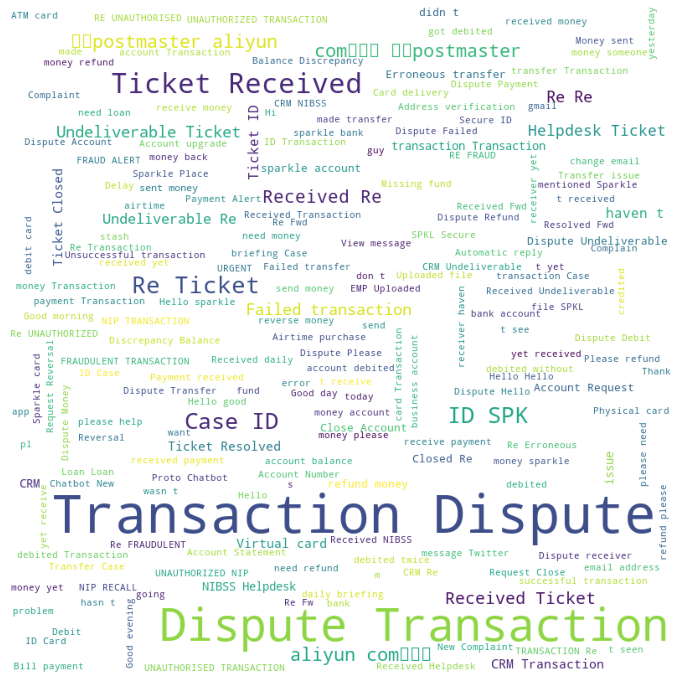

In [50]:
from wordcloud import WordCloud


# combine all text into one string
text = ' '.join(df['Text'])

# create wordcloud
wordcloud = WordCloud(width=800, height=800, background_color='white').generate(text)

# plot wordcloud
plt.figure(figsize=(12, 14))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
